In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np
import matplotlib as mpl
from matplotlib import cm
from textwrap import fill

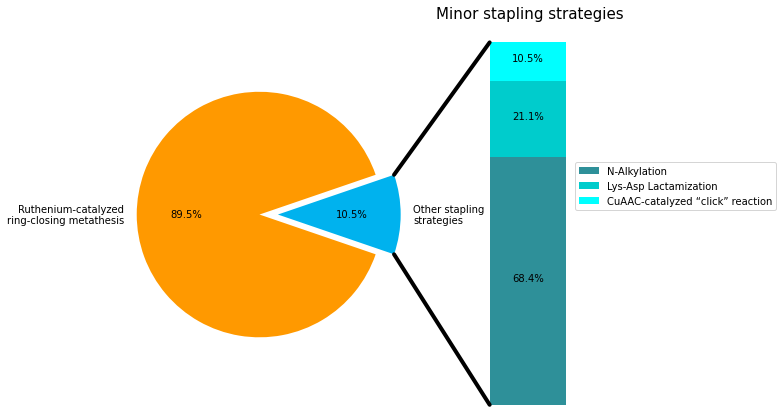

In [2]:
# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 7))
fig.subplots_adjust(wspace=0)

# pie chart parameters
stapling_strategies = [19,162]
ratios=[]
for i in stapling_strategies:
    ratio=i/sum(stapling_strategies)
    ratios.append(ratio)
labels = [ 'Other stapling strategies','Ruthenium-catalyzed ring-closing metathesis' ]
labels = [fill(label,23) for label in labels]
explode = [0.15, 0]
colors=['#00B2EE','#ff9900']
# rotate so that first wedge is split by the x-axis
angle = -180 * ratios[0]
ax1.pie(stapling_strategies, autopct='%1.1f%%', startangle=angle, colors=colors, labels=labels, explode=explode)

# bar chart parameters
xpos = 0
bottom = 0
residues = [13,4,2]
ratios=[]
for i in residues:
    ratio=i/sum(residues)
    ratios.append(ratio)
width = .2
colors = [['#2E9099'],['#00cccc'],['#00ffff']]
for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%1.1f%%" % (ax2.patches[j].get_height() * 100),
             ha='center')

ax2.set_title('Minor stapling strategies',x=0.38,fontsize=15)
legends=('N-Alkylation','Lys-Asp Lactamization','CuAAC-catalyzed “click” reaction')
ax2.legend(legends,bbox_to_anchor=(0.7, 0.35, 0.5, 0.3),fontsize=10)
ax2.axis('off')
ax2.set_xlim(- 1.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])
# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()

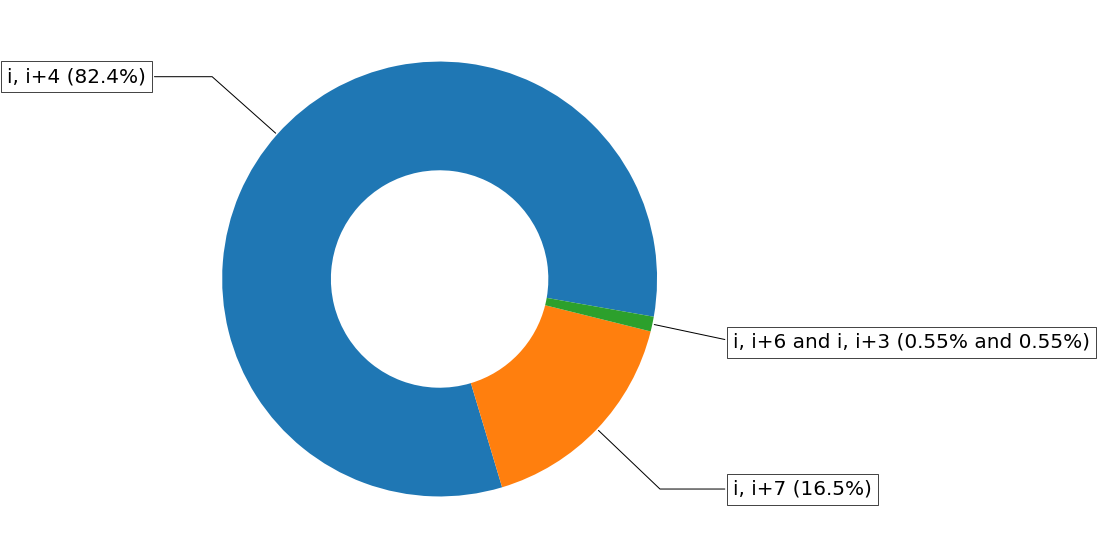

In [3]:
fig, ax = plt.subplots(figsize=(20,10), subplot_kw=dict(aspect="equal"))

recipe = ["i, i+4 (82.4%)",
          "i, i+7 (16.5%)",
          "i, i+6 and i, i+3 (0.55% and 0.55%)"]

data = [150,30,2]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-10)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], fontsize=20,xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)


plt.show()